# Time Series Problem Set: Question 3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.regression.linear_model import OLS
import arch  # Requires the arch library: https://pypi.org/project/arch/

## Part (a)

In [2]:
N = 250

In [3]:
def construct_data(a1, b1, c0, c1, d1, epsilon=np.random.randn(N)):
    ''' Gaussian epsilon process. '''
    r = np.zeros(N)
    mu = np.zeros(N)
    v = np.zeros(N)
    sigma = np.zeros(N)
    epsilon = np.random.randn(N)
    epsilon[0] = 0

    for t in range(1, N):
        sigma[t] = np.sqrt(c0 + c1 * v[t-1]**2 + d1 * sigma[t-1]**2)
        v[t] = sigma[t] * epsilon[t]
        mu[t] = b1 * r[t-1] - a1 * v[t-1]
        r[t] = mu[t] + v[t]
    
    return r, mu, v, sigma, epsilon

In [4]:
r, mu, v, sigma, epsilon = construct_data(0.5, 1, 0.4, 0.3, 0.2)

## Part (b)

In [5]:
result1 = OLS(r[1:], r[:-1]).fit()
b1_est = result1.params.item()
phi = pd.Series(result1.resid)

result2 = OLS(phi, v[:-1]).fit()

# Per the email correction
gamma_ratio = phi.autocorr(lag=1) / phi.autocorr(lag=0)
a1_est1 = - (np.sqrt(1 - 4*gamma_ratio**2) + 1) / (2*gamma_ratio)
a1_est2 = (np.sqrt(1 - 4*gamma_ratio**2) - 1) / (2*gamma_ratio)
a1_est = a1_est1 if np.abs(a1_est1) < 1 else a1_est2

# Pretty good estimate!
print(f'a1 estimate: {a1_est:.3f}')
print(f'b1 estimate: {b1_est:.3f}')

a1 estimate: 0.250
b1 estimate: 0.705


## Part (c)

In [6]:
# Not getting such a good fit for some reason...
am = arch.arch_model(r.reshape(-1, 1), v.reshape(-1, 1), dist='Gaussian')
result = am.fit(disp='off')
print(result.params)

mu         -0.320302
omega       0.256038
alpha[1]    0.432158
beta[1]     0.457627
Name: params, dtype: float64


## Part (d)

In [7]:
r, mu, v, sigma, epsilon = construct_data(0.5, 1, 0.4, 0.3, 0.2,
                                          epsilon=np.random.standard_t(df=8, size=N))

am = arch.arch_model(r.reshape(-1, 1), v.reshape(-1, 1), dist='Gaussian')
result = am.fit(disp='off')
print(result.params)

mu         -0.494541
omega       0.283469
alpha[1]    0.649784
beta[1]     0.350216
Name: params, dtype: float64


## Part (e)

In [8]:
params = [
    [0.5, 1, 0.4, 0.3, 0.2],
    [0.5, 1, 0.04, 0.95, 0],
    [0.99, 0.5, 0.4, 0.3, 0.2],
    [0.5, 1, 0.4, 0.3, 0.2]
]

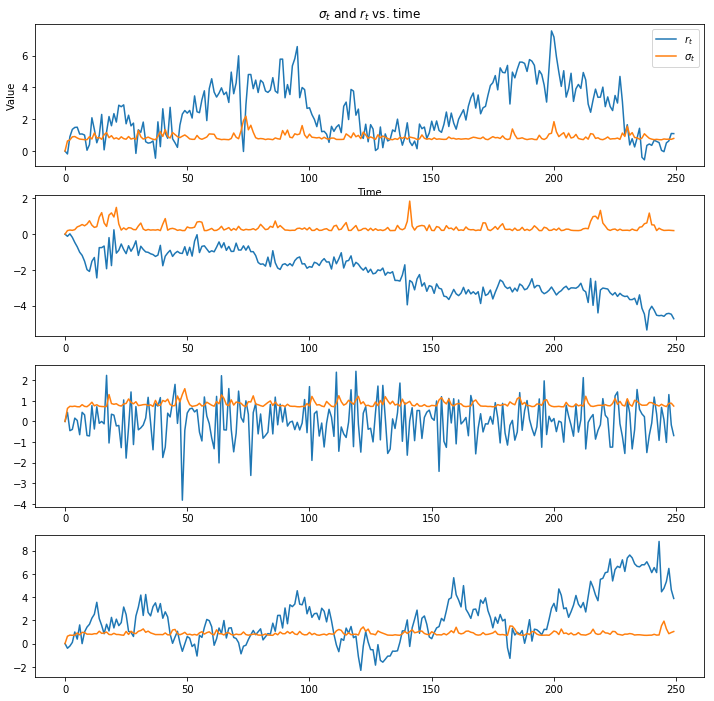

In [9]:
fig, axarr = plt.subplots(nrows=4, ncols=1, figsize=[12, 12])

for param, ax in zip(params, axarr):
    r, mu, v, sigma, epsilon = construct_data(*param)
    ax.plot(r, label='$r_t$')
    ax.plot(sigma, label='$\sigma_t$')

axarr[0].set_title('$\sigma_t$ and $r_t$ vs. time')
axarr[0].set_xlabel('Time')
axarr[0].set_ylabel('Value')
axarr[0].legend();